In [3]:
#!pip install mlxtend

In [6]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.classifier import StackingClassifier

data = load_iris()
import numpy as np

clf = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier(n_neighbors=2)
clf4 = MultinomialNB()

sclf = StackingClassifier(classifiers=[clf2, clf3, clf4], meta_classifier=clf)

In [9]:
from sklearn.model_selection import cross_val_score
for clf, label in zip([clf2, clf3, clf4, sclf],
                     ['RandomForest',
                     'KNN',
                     'NaiveBayes']):
    scores = cross_val_score(clf, data.data, data.target, cv=3, scoring='accuracy')
    print(scores)

[0.98 0.94 0.96]
[0.96 0.94 0.94]
[0.96 0.92 0.96]


array([0.96, 0.92, 0.96])

ValueError: Filler values must be provided when X has more than 2 training features.

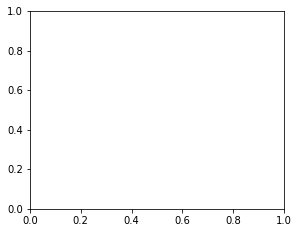

In [12]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as grd
import itertools

gs = grd.GridSpec(2,2)
fi = plt.figure(figsize=(10,8))

for clf, lab, grd in zip([clf2, clf3, clf4, sclf],
                     ['RandomForest',
                     'KNN',
                     'NaiveBayes',
                     'StackingClassifier'],
                        itertools.product([0,1], repeat=2)):
    clf.fit(data.data, data.target)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=data.data, y= data.target, clf = clf)
    plt.title(lab)
    